In [12]:
import networkx as nx
from networkx.algorithms import community
import matplotlib as plt
import numpy as np

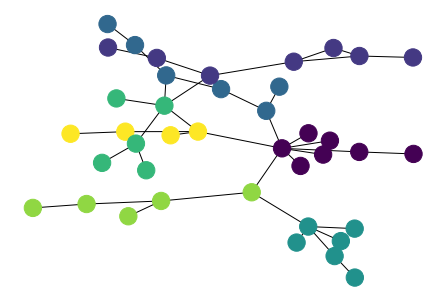

In [78]:
G = nx.read_edgelist('out.hiv', comments='%')
c = community.greedy_modularity_communities(G)
col = np.empty(40)
N = len(c)
for i in range(N):
    ind = np.array(list(c[i])).astype(np.int)-1
    col[ind] = (np.float(i)/N)*np.ones(len(ind))
nx.draw(G, node_color=col)

In [76]:
def modQ(G, part): # assuming part is a list of frozenlists of node labels
    M = len(G.edges)
    Q = 0
    for x in part:
        x = list(x)
        CM = G.subgraph(x)
        M_x = len(CM.edges)
        degree_list = np.array(G.degree(x), dtype=int)
        deg_sum = np.sum(degree_list[:, 1])
        Q += (M_x/M - (deg_sum/(2*M))**2)
    return Q

In [77]:
print(modQ(G, c))

0.6805472932778108
